<a href="https://colab.research.google.com/github/SaeidAbdolian/Mini-projects-of-images-processing/blob/main/High-Pass-Prewitt-Filter/High_Pass_Prewitt_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**High-Pass_Prewitt_Filter**


Filtering an Image Image filtering is useful for many applications, including smoothing, sharpening, removing noise, and edge detection. A filter is defined by a kernel, which is a small array applied to each pixel and its neighbors within an image. In most applications, the center of the kernel is aligned with the current pixel, and is a square with an odd number (3, 5, 7, etc.) of elements in each dimension. The process used to apply filters to an image is known as convolution, and may be applied in either the spatial or frequency domain. See Overview of Transforming Between Image Domains for more information on image domains.

Within the spatial domain, the first part of the convolution process multiplies the elements of the kernel by the matching pixel values when the kernel is centered over a pixel. The elements of the resulting array (which is the same size as the kernel) are averaged, and the original pixel value is replaced with this result. The CONVOL function performs this convolution process for an entire image.

Within the frequency domain, convolution can be performed by multiplying the FFT (Fast Fourier Transform) of the image by the FFT of the kernel, and then transforming back into the spatial domain. The kernel is padded with zero values to enlarge it to the same size as the image before the forward FFT is applied. These types of filters are usually specified within the frequency domain and do not need to be transformed. IDL's DIST and HANNING functions are examples of filters already transformed into the frequency domain. See Windowing to Remove Noise for more information on these types of filters.

The following examples in this section will focus on some of the basic filters applied within the spatial domain using the CONVOL function:

Low Pass Filtering

Low Pass Filtering

High Pass Filtering

Directional Filtering

Laplacian Filtering

Sobel Filtering

Prewitt Filtering

Gaussian Filter

we are using High-Pass-Prewitt-Filter .

Edge detection filters focus on finding sharp contrast or border between colors in an image to create edges or lines.

**Prewitt Filter :**
A square kernel that includes the diagonal pixels just as strongly as the orthogonal pixels. Gives a very strong effect.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [9]:
!wget "https://lh3.googleusercontent.com/proxy/Ae2_-j_xGB9Fv0ecV781BTC45J_3S0vyU_OFZzuRLF6MTxwJEqngIE4fFx1lkj3L2yu0t_Z22mLdAiaPrO2G0BZueXl5kPVEgIavTiC_Zpvnnt16KSSH" -O AMOL_IRAN.jpg

--2020-11-25 19:23:03--  https://lh3.googleusercontent.com/proxy/Ae2_-j_xGB9Fv0ecV781BTC45J_3S0vyU_OFZzuRLF6MTxwJEqngIE4fFx1lkj3L2yu0t_Z22mLdAiaPrO2G0BZueXl5kPVEgIavTiC_Zpvnnt16KSSH
Resolving lh3.googleusercontent.com (lh3.googleusercontent.com)... 173.194.215.132, 2607:f8b0:400c:c02::84
Connecting to lh3.googleusercontent.com (lh3.googleusercontent.com)|173.194.215.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55668 (54K) [image/jpeg]
Saving to: ‘AMOL_IRAN.jpg’

AMOL_IRAN.jpg       100%[===================>]  54.36K  --.-KB/s    in 0.001s  

2020-11-25 19:23:03 (100 MB/s) - ‘AMOL_IRAN.jpg’ saved [55668/55668]



In [10]:
img = cv.imread('AMOL_IRAN.jpg')
if len(img.shape) == 3:
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = np.array(img)

In [11]:
fltr_h = np.array([[1, 0, -1],
                  [1, 0, -1],
                  [1, 0, -1]])

fltr_v = np.array([[1, 1, 1],
                  [0, 0, 0],
                  [-1, -1, -1]])

In [12]:
shape = img.shape
output_h = np.zeros((shape[0], shape[1]))
output_v = np.zeros((shape[0], shape[1]))
win = fltr_h.shape[0]
for i in range(0, shape[0]):
    for j in range(0, shape[1]):
        if i < int(win/2) or shape[0]-i <= int(win/2) or j < int(win/2) or shape[1]-j <= int(win/2):
            continue
        kernel = img[i-int(win/2):i+int(win/2)+1, j-int(win/2):j+int(win/2)+1]              
        output_h[i, j] = np.sum(np.multiply(kernel, fltr_h))
        output_v[i, j] = np.sum(np.multiply(kernel, fltr_v))
output = np.divide(np.add(output_h, output_v), 2)

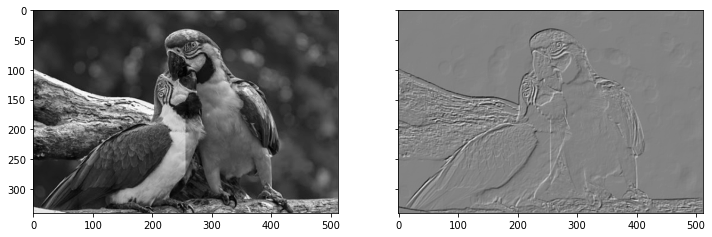

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (12,4))
ax1.imshow(img, cmap='gray')
ax2.imshow(output, cmap='gray')
plt.show()